In [2]:
import torch

In [3]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

The three areas where computer vision is being used in the industry include facial recognition. The function has extensiv use
and application in public safety, dating, security, banking, retail and events. A Russian startup, NtecLab which was formed in 2015
is one of the fastet growing companies after developing a facial recognition algorithm that takes less than a second to to search through 1.5 billion images. 

Computer vision use has also been extended to healthcare and traffic monioring. In healthcare it is used in surgery. Computer vision has allowed extensive use of medical imaging data  thereby  enablin provision of better diagnosis. For example brain waves imaging to identify tumours.


Computer vision enables intelligent transportation systems (ITS) to monitor conditions, detect accidents and optimise traffic flow.

Overfitting is creating a model that more of memorrises trainig data and fails to make accurate  predictions when the model is fed with new data.

Ways to prevent overfitting.

1. Use more data
2. Apply model complexity
3. Use cross validation

The training data can be increased if the model is overfitting so that the model is forced to learn on new features.

Increased complexity helps to improve on how the data is processed as the model might be able to evaluate more features. 

Cross validating results with a validation data set, which has been preprocessed in the same way will help to establish if the model is giving 
the same level of accuracy if it is tested on new data.

In [4]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.2.2
torchvision version: 0.17.2


In [5]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [6]:
#Check the dataset sample
image, label = train_data[2]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [9]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
class_names = train_data.classes


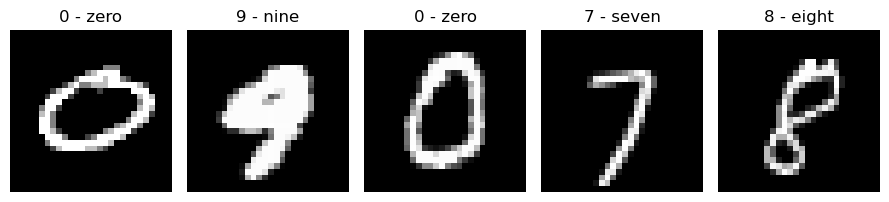

In [11]:
#Plot sample images
torch.manual_seed(44)
fig, axes = plt.subplots(1, 5, figsize=(9, 9))
for i in range(5):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    image, label = train_data[random_idx]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(class_names[label])
    axes[i].axis(False)
    
plt.tight_layout()
plt.show()
  


In [12]:
#Prepare DataLoader
from torch.utils.data import DataLoader

#Set Batch size
BATCH_SIZE = 32

#Turn datasets into iterables
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

#Lets check what we have created
print(f"Dataloaders {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test_dataloader {len(test_dataloader)} batch size of {BATCH_SIZE}")

Dataloaders (<torch.utils.data.dataloader.DataLoader object at 0x13164c1d0>, <torch.utils.data.dataloader.DataLoader object at 0x13164c680>)
Length of train_dataloader 1875 batches of size 32
Length of test_dataloader 313 batch size of 32


In [13]:
#Check what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label :4, label size: torch.Size([])


(-0.5, 27.5, 27.5, -0.5)

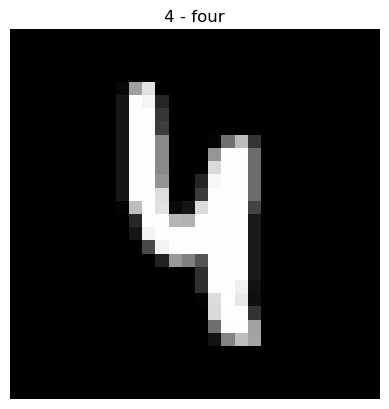

In [14]:
#Check a single sample
torch.manual_seed (44)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]

print(f"Image size: {image.shape}")
print(f"Label :{label}, label size: {label.shape}")

plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("Off")

In [15]:
#Model Building
# Create a flatten layer
flatten_model = nn.Flatten() #For all nn modules function as a model

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) #Perfom forward pass

#Print result
print(f" Shape befor flattening: {x.shape} -> [colour_channels, height, width]")
print(f"Shape after flattening {output.shape} -> [colour_channels, heigth, width]")

 Shape befor flattening: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Shape after flattening torch.Size([1, 784]) -> [colour_channels, heigth, width]


In [16]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [17]:
torch.manual_seed(44)
model2 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model2.parameters()).device # check model device

device(type='cpu')

In [18]:
#Calculation accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))* 100
    return acc
    

In [19]:
#Set up loss optimiser and evaluation metrics
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(44)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model2.train()
        # 1. Forward pass
        y_pred = model2(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Trained on {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model2(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model1 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples

Train loss: 0.80862 | Test loss: 0.52536, Test acc: 82.96%

Epoch: 1
-------
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples

Train loss: 0.51476 | Test loss: 0.48441, Test acc: 83.74%

Epoch: 2
-------
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples

Train loss: 0.47796 | Test loss: 0.46227, Test acc: 84.36%

Train time on cpu: 50.858 seconds


In [22]:
torch.manual_seed(44)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model1_results = eval_model(model=model2, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4622710049152374,
 'model_acc': 84.35503194888179}

In [24]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random

# Set seed for reproducibility
random.seed(44)

# Select 5 random samples and labels from test_data
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# Print shape and label for the first 5 samples
for i in range(5):
    print(f"Test sample {i+1} image shape: {test_samples[i].shape}")
    print(f"Test sample {i+1} label: {test_labels[i]} ({class_names[test_labels[i]]})\n")


Test sample 1 image shape: torch.Size([1, 28, 28])
Test sample 1 label: 6 (6 - six)

Test sample 2 image shape: torch.Size([1, 28, 28])
Test sample 2 label: 4 (4 - four)

Test sample 3 image shape: torch.Size([1, 28, 28])
Test sample 3 label: 4 (4 - four)

Test sample 4 image shape: torch.Size([1, 28, 28])
Test sample 4 label: 5 (5 - five)

Test sample 5 image shape: torch.Size([1, 28, 28])
Test sample 5 label: 0 (0 - zero)



In [29]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:5]

tensor([[9.1936e-04, 5.4552e-06, 5.0854e-04, 9.2680e-06, 1.0744e-05, 1.1853e-02,
         9.8609e-01, 5.4552e-06, 5.9055e-04, 5.4552e-06],
        [7.2408e-04, 7.2408e-04, 7.2408e-04, 7.2408e-04, 3.8071e-02, 5.7645e-03,
         7.2408e-04, 7.2408e-04, 1.1141e-01, 8.4041e-01],
        [1.9425e-07, 1.9425e-07, 1.9425e-07, 5.1813e-07, 9.9982e-01, 5.3205e-05,
         2.6669e-06, 3.2738e-06, 1.2114e-05, 1.0537e-04],
        [5.0282e-03, 6.5934e-07, 4.3898e-05, 9.6680e-07, 6.5934e-07, 9.1844e-01,
         7.4570e-02, 6.5934e-07, 1.9120e-03, 3.0041e-06],
        [9.9378e-01, 3.3735e-05, 5.2439e-03, 3.3735e-05, 3.3735e-05, 1.5969e-04,
         1.7787e-04, 3.3735e-05, 4.6612e-04, 3.3735e-05]])

In [30]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 9, 4, 5, 0])

In [31]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([6, 4, 4, 5, 0], tensor([6, 9, 4, 5, 0]))

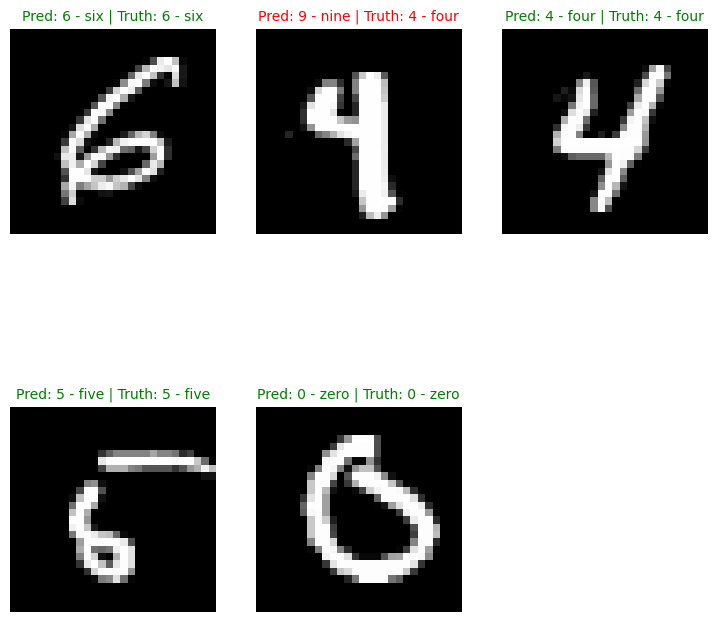

In [33]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 2
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

In [34]:
#Steps to plot confusion matrix

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [37]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [35]:
#Import neccesary modules
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


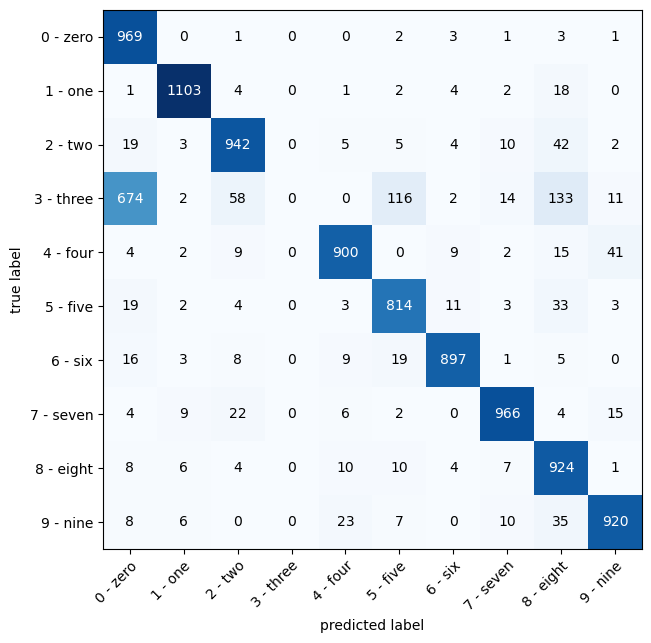

In [38]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

The model seems to perfom well as it is able to correctly predict most digits. However, some digits like seem to be difficult to predict.
The Confusionmatrix shows that 3 was wrongly predicted as 8 for 133 times and as 5 for 116 times. This could be due the style of the print or
the mdel finding it difficult to detect digits 3 and 8 if not clearly printed.

In [39]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "model2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/model2.pth


In [93]:
torch.manual_seed(44)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(1, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.5862e+00,  1.1253e+00,  1.8306e+00,  ..., -2.6726e-02,
          -3.4329e-01, -1.1225e+00],
         [ 2.1260e+00, -4.8554e-01, -9.0253e-01,  ..., -2.7885e-01,
           3.2873e-01, -1.5298e+00],
         [ 5.6909e-01,  1.2105e-01,  7.5796e-01,  ..., -5.4292e-01,
           9.1108e-01,  3.0177e-01],
         ...,
         [-7.6456e-01,  4.0868e-02,  5.2986e-01,  ..., -2.8454e-01,
          -6.5648e-01,  8.8403e-01],
         [ 1.5526e+00, -3.3601e+00, -2.0404e+00,  ...,  3.0866e+00,
           7.3811e-01,  9.3801e-01],
         [-2.5914e-01, -4.4454e-01,  1.3582e+00,  ..., -1.5278e+00,
          -5.9377e-01, -2.5479e-03]],

        [[-1.9937e-01,  5.9280e-01, -1.4744e+00,  ...,  6.3601e-02,
           1.2848e+00, -9.4021e-01],
         [ 4.8493e-01,  4.3750e-01,  1.7293e+00,  

In [48]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
torch.manual_seed(44)


conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=5,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0) # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.1538,  0.5923,  0.5339,  ...,  0.7574,  0.1341, -0.0967],
         [ 0.9963, -0.4660, -0.1928,  ..., -0.3675,  0.3674,  0.6974],
         [-0.0846,  0.5187, -0.4894,  ...,  0.2907,  0.7854,  0.7158],
         ...,
         [ 0.3198,  0.6915,  0.5255,  ...,  0.2314, -0.2695,  0.1568],
         [ 0.0724, -0.0842, -0.2035,  ..., -0.0744, -0.0317, -0.6275],
         [ 0.4443,  0.5124,  0.1680,  ...,  0.1334, -0.5821,  0.9857]],

        [[ 0.4757,  0.1817,  0.0609,  ..., -0.6127, -0.0733,  0.6214],
         [ 0.9477, -0.2191,  0.4510,  ..., -0.1033, -0.7764,  0.2233],
         [ 0.3641, -0.6228,  0.7400,  ...,  0.4127, -0.1003, -0.0353],
         ...,
         [ 0.1189,  0.8979, -1.8080,  ..., -0.6147,  0.8253, -0.5747],
         [ 0.3167,  0.7218, -1.3011,  ..., -1.2246,  1.1344, -0.3233],
         [-0.8766, -0.1814,  0.2713,  ...,  0.7211,  0.2176, -0.7649]],

        [[-0.3873, -0.1404,  0.6067,  ..., -0.8534, -0.0879,  0.5388],
         [-0.5637,  0.8172,  0.0235,  ...,  0

In [66]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 5, 62, 62])

In [67]:
# Check out the conv_layer_2 internal parameters
print(conv_layer.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0845,  0.0888,  0.1262],
          [-0.1407,  0.0493,  0.0884],
          [-0.0815, -0.1112,  0.1861]],

         [[ 0.1433,  0.1790,  0.1092],
          [ 0.1184, -0.1690,  0.0857],
          [-0.0633,  0.0135,  0.0815]],

         [[ 0.1147, -0.0853,  0.1519],
          [ 0.0652,  0.1520, -0.0200],
          [-0.0082, -0.0561, -0.1745]]],


        [[[ 0.0951,  0.1086, -0.0271],
          [-0.1490,  0.1314, -0.0009],
          [-0.0541,  0.0951, -0.1590]],

         [[-0.0073, -0.0029,  0.0920],
          [-0.0406, -0.1813,  0.1038],
          [ 0.0467, -0.1582, -0.0276]],

         [[-0.1813,  0.0804, -0.0392],
          [-0.1296,  0.0855, -0.1147],
          [ 0.1148,  0.1326, -0.1855]]],


        [[[-0.1520,  0.1089, -0.1481],
          [ 0.0458,  0.0938,  0.0038],
          [-0.0920,  0.0086,  0.0500]],

         [[ 0.1497,  0.1740,  0.0067],
          [ 0.0110, -0.0722, -0.0342],
          [-0.0473,  0.0580,  0.0308]],

         [[-0.1600,  

In [68]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer weight shape: \n{conv_layer.weight.shape} ")
print(f"\nconv_layer bias shape: \n{conv_layer.bias.shape} ")

conv_layer weight shape: 
torch.Size([5, 3, 3, 3]) 

conv_layer bias shape: 
torch.Size([5]) 


PREDICTIONS WITH THE SAVED MODEL model2

In [147]:
import torch
import torch.nn as nn
import random
from torchvision import datasets
from torchvision.transforms import ToTensor

# Define the model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 10)  # Matches layer_stack.1
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)   # Matches layer_stack.3

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
model1 = MyModel()

# Load the saved model's state dictionary
state_dict = torch.load("models/model2.pth")

# Rename keys in the state dict to match the model's layer names
new_state_dict = {
    "fc1.weight": state_dict["layer_stack.1.weight"],
    "fc1.bias": state_dict["layer_stack.1.bias"],
    "fc2.weight": state_dict["layer_stack.3.weight"],
    "fc2.bias": state_dict["layer_stack.3.bias"]
}

# Load the modified state dict into the model
model1.load_state_dict(new_state_dict)

# Set the model to evaluation mode
model1.eval()

# Print the model architecture
print(model1)

# Load test data
test_data1 = datasets.FashionMNIST(
    root="data",
    train=False,  # Get test data
    download=True,
    transform=ToTensor()
)

# Define class names for FashionMNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Select 5 random test samples
random.seed(44)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data1), k=5):
    test_samples.append(sample)
    test_labels.append(label)

# Print shape and label for the first 5 samples
for i in range(5):
    print(f"Test sample {i+1} image shape: {test_samples[i].shape}")
    print(f"Test sample {i+1} label: {test_labels[i]} ({class_names[test_labels[i]]})\n")

# Function to make predictions
def make_predictions(model: nn.Module, data: list, device: torch.device = torch.device("cpu")):
    pred_probs = []
    model.to(device)
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # Disable gradient computation
        for sample in data:
            # Ensure sample is a tensor and detach from computation graph
            sample = sample.clone().detach().to(torch.float32)  # Avoids warning
            sample = sample.view(1, -1).to(device)  # Flatten image to (1, 784)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)  # Softmax on logits dimension
            pred_probs.append(pred_prob.cpu().numpy())  # Collect probabilities (move to CPU if on GPU)

    return pred_probs

# Make predictions on test samples
pred_probs1 = make_predictions(model=model1, data=test_samples)

# Compare true labels against predicted labels
for i in range(5):
    predicted_label = pred_probs1[i].argmax()  # Get index of max probability
    true_label = test_labels[i]
    
    print(f"Sample {i+1}:")
    print(f"  True Label      : {true_label} ({class_names[true_label]})")
    print(f"  Predicted Label : {predicted_label} ({class_names[predicted_label]})\n")


MyModel(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=10, bias=True)
)
Test sample 1 image shape: torch.Size([1, 28, 28])
Test sample 1 label: 1 (Trouser)

Test sample 2 image shape: torch.Size([1, 28, 28])
Test sample 2 label: 7 (Sneaker)

Test sample 3 image shape: torch.Size([1, 28, 28])
Test sample 3 label: 2 (Pullover)

Test sample 4 image shape: torch.Size([1, 28, 28])
Test sample 4 label: 4 (Coat)

Test sample 5 image shape: torch.Size([1, 28, 28])
Test sample 5 label: 2 (Pullover)

Sample 1:
  True Label      : 1 (Trouser)
  Predicted Label : 8 (Bag)

Sample 2:
  True Label      : 7 (Sneaker)
  Predicted Label : 4 (Coat)

Sample 3:
  True Label      : 2 (Pullover)
  Predicted Label : 0 (T-shirt/top)

Sample 4:
  True Label      : 4 (Coat)
  Predicted Label : 8 (Bag)

Sample 5:
  True Label      : 2 (Pullover)
  Predicted Label : 8 (Bag)



The model does not perfom well on images of digital data. The data was processed so that it takes the same shape and was also flattened however
it did not produce the best results. The model wil most likely perfom better if it istrained on the same type of data so that it gets an opportunity to learn the images before making predictions.